# 空氣污染監測網 網路爬蟲實作練習


* 能夠利用 selenium + BeautifulSoup 撰寫爬蟲，並存放到合適的資料結構


## 作業目標

根據範例 ，完成以下問題：

* ① 取出 台北市士林區 2018/01 – 2018/08 的 SO2 資料
* ② 取出 台北市士林區 2018/01 – 2018/08 的 SO2、CO 資料





In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup

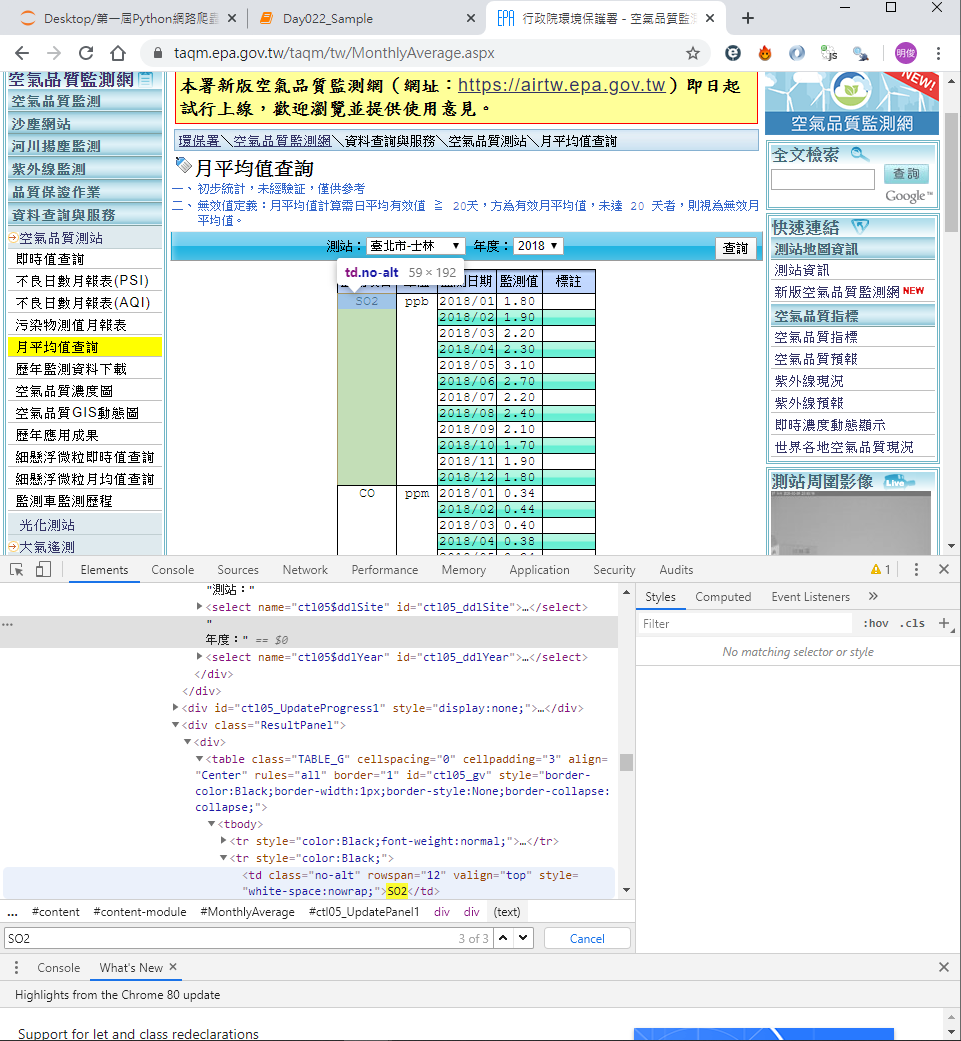

### ① 取出 台北市士林區 2018/01 – 2018/08 的 SO2 資料

In [2]:
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("http://taqm.epa.gov.tw/taqm/tw/MonthlyAverage.aspx")

selectYear = Select(browser.find_element_by_id("ctl05_ddlYear"))
selectYear.select_by_value('2018')

browser.find_element_by_id('ctl05_btnQuery').click()

In [3]:
html_source = browser.page_source
print(html_source)

<html xmlns="http://www.w3.org/1999/xhtml" lang="zh-TW"><head id="Head1"><base href="https://taqm.epa.gov.tw/taqm/tw/"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><title>行政院環境保護署－空氣品質監測網 - 月平均值查詢</title><meta name="title" content="空氣品質監測網(TAQM)">
<!--link rel="govtwsimpledc.xsd" href="http://www.gov.tw/schema/dc/" title="Dublin Core" /--> 
<link type="text/css" href="/taqm/tw/style/all.min.css?v=20180508c" rel="stylesheet">
<script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" src="/taqm/script/jquery.min.js"></script>
<script type="text/javascript" src="/taqm/script/jquery.myslide2.min.js"></script>
<script type="text/javascript">
function DownloadReport(url) {
	var win = window.open("DownloadReport.aspx?file="+escape(url),"download" /*,"modal=yes,menubar=no,scrollbars=no,status=no,titlebar=no,toolbar=no,height=200px,width=300px"*/);

In [4]:
browser.quit()

In [5]:
soup = BeautifulSoup(html_source, 'html.parser')
print(soup)


<html lang="zh-TW" xmlns="http://www.w3.org/1999/xhtml"><head id="Head1"><base href="https://taqm.epa.gov.tw/taqm/tw/"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>行政院環境保護署－空氣品質監測網 - 月平均值查詢</title><meta content="空氣品質監測網(TAQM)" name="title"/>
<!--link rel="govtwsimpledc.xsd" href="http://www.gov.tw/schema/dc/" title="Dublin Core" /-->
<link href="/taqm/tw/style/all.min.css?v=20180508c" rel="stylesheet" type="text/css"/>
<script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></script><script src="/taqm/script/jquery.min.js" type="text/javascript"></script>
<script src="/taqm/script/jquery.myslide2.min.js" type="text/javascript"></script>
<script type="text/javascript">
function DownloadReport(url) {
	var win = window.open("DownloadReport.aspx?file="+escape(url),"download" /*,"modal=yes,menubar=no,scrollbars=no,status=no,titlebar=no,toolbar=no,height=200px,width=300px"

In [6]:
table = soup.find('table', class_='TABLE_G')
print(table)

<table align="Center" border="1" cellpadding="3" cellspacing="0" class="TABLE_G" id="ctl05_gv" rules="all" style="border-color:Black;border-width:1px;border-style:None;border-collapse:collapse;">
<tbody><tr style="color:Black;font-weight:normal;">
<th scope="col">監測項目</th><th scope="col">單位</th><th scope="col">監測日期</th><th scope="col">監測值</th><th scope="col">標註</th>
</tr><tr style="color:Black;">
<td class="no-alt" rowspan="12" style="white-space:nowrap;" valign="top">SO2</td><td class="no-alt" rowspan="12" valign="top">ppb</td><td>2018/01</td><td>1.80</td><td> </td>
</tr><tr class="ALT" style="color:Black;">
<td>2018/02</td><td>1.90</td><td> </td>
</tr><tr style="color:Black;">
<td>2018/03</td><td>2.20</td><td> </td>
</tr><tr class="ALT" style="color:Black;">
<td>2018/04</td><td>2.30</td><td> </td>
</tr><tr style="color:Black;">
<td>2018/05</td><td>3.10</td><td> </td>
</tr><tr class="ALT" style="color:Black;">
<td>2018/06</td><td>2.70</td><td> </td>
</tr><tr style="color:Black;">
<td>

In [8]:
data = {}
AlltdData = table.find_all('td')

for tag in AlltdData:
    if tag.attrs and tag.get('style'):
        data.setdefault(tag.text, {})
    elif not tag.attrs and tag.text.strip():
        if '/' in tag.text:
            k = tag.text
        else:
            data[list(data.keys())[-1]].setdefault(k, tag.text)
print(data)

{'SO2': {'2018/01': '1.80', '2018/02': '1.90', '2018/03': '2.20', '2018/04': '2.30', '2018/05': '3.10', '2018/06': '2.70', '2018/07': '2.20', '2018/08': '2.40', '2018/09': '2.10', '2018/10': '1.70', '2018/11': '1.90', '2018/12': '1.80'}, 'CO': {'2018/01': '0.34', '2018/02': '0.44', '2018/03': '0.40', '2018/04': '0.38', '2018/05': '0.34', '2018/06': '0.29', '2018/07': '0.21', '2018/08': '0.30', '2018/09': '0.26', '2018/10': '0.29', '2018/11': '0.30', '2018/12': '0.35'}, 'O3': {'2018/01': '33.40', '2018/02': '32.50', '2018/03': '35', '2018/04': '38.40', '2018/05': '31.60', '2018/06': '29.50', '2018/07': '18.70', '2018/08': '26.40', '2018/09': '29.10', '2018/10': '45.90', '2018/11': '32.40', '2018/12': '30.70'}, 'PM10': {'2018/01': '23', '2018/02': '41', '2018/03': '39', '2018/04': '48', '2018/05': '37', '2018/06': '26', '2018/07': '24', '2018/08': '26', '2018/09': '28', '2018/10': '33', '2018/11': '25', '2018/12': '21'}, 'NOx': {'2018/01': '14.17', '2018/02': '19.43', '2018/03': '18.50',

In [10]:
import pandas as pd
df = pd.DataFrame(data)
df

,SO2,CO,O3,PM10,NOx,NO,NO2,THC,NMHC,CH4
2018/01,1.80,0.34,33.40,23,14.17,3.41,10.77,NaN,NaN,NaN
2018/02,1.90,0.44,32.50,41,19.43,4.48,14.95,NaN,NaN,NaN
2018/03,2.20,0.40,35,39,18.50,4.93,13.56,NaN,NaN,NaN
2018/04,2.30,0.38,38.40,48,15.24,2.60,12.64,NaN,NaN,NaN
2018/05,3.10,0.34,31.60,37,15.20,2.26,12.94,NaN,NaN,NaN
2018/06,2.70,0.29,29.50,26,13.79,2.41,11.38,NaN,NaN,NaN
2018/07,2.20,0.21,18.70,24,11.60,2.68,8.92,NaN,NaN,NaN
2018/08,2.40,0.30,26.40,26,14.75,2.68,12.08,NaN,NaN,NaN
2018/09,2.10,0.26,29.10,28,12.40,2.41,10,NaN,NaN,NaN
2018/10,1.70,0.29,45.90,33,12.45,2.13,10.33,NaN,NaN,NaN


In [14]:
df1 = df[['SO2']].iloc[:8].reset_index()
print(df1)

     index   SO2
0  2018/01  1.80
1  2018/02  1.90
2  2018/03  2.20
3  2018/04  2.30
4  2018/05  3.10
5  2018/06  2.70
6  2018/07  2.20
7  2018/08  2.40


### ② 取出 台北市士林區 2018/01 – 2018/08 的 SO2、CO 資料

In [16]:
'''
Your Code
'''
df2 = df[['SO2', 'CO']].iloc[:8].reset_index()
print(df2)

     index   SO2    CO
0  2018/01  1.80  0.34
1  2018/02  1.90  0.44
2  2018/03  2.20  0.40
3  2018/04  2.30  0.38
4  2018/05  3.10  0.34
5  2018/06  2.70  0.29
6  2018/07  2.20  0.21
7  2018/08  2.40  0.30
